In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa 
import librosa.display
import seaborn as sns

In [2]:
def load_audio(audio_file):
    return librosa.load(audio_file, sr=None)

In [3]:
df_fan_train =pd.read_csv('fichier_fan_train.csv', index_col=0)
df_fan_train.head()

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,0
1,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,0
2,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,0
3,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,0
4,C:/Users/romua/Documents/Formation_data_scient...,fan,0,normal,0


In [4]:
df_fan_test =pd.read_csv('fichier_fan_test.csv', index_col=0)
df_fan_test.head()

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,fan,0,anomaly,1
1,C:/Users/romua/Documents/Formation_data_scient...,fan,0,anomaly,1
2,C:/Users/romua/Documents/Formation_data_scient...,fan,0,anomaly,1
3,C:/Users/romua/Documents/Formation_data_scient...,fan,0,anomaly,1
4,C:/Users/romua/Documents/Formation_data_scient...,fan,0,anomaly,1


In [5]:
# Création de la liste des amplitudes des échantillons audio d'entrainement du fan
list_fan_train = list()
for i in range(len(df_fan_train)//6):
    list_fan_train.append(load_audio(df_fan_train.iloc[i,0])[0])
    
   

In [6]:
# Création de la liste des amplitudes de tous les échantillons audio de test du fan
list_fan_test = list()
for i in range(len(df_fan_test)//6):
    list_fan_test.append(load_audio(df_fan_test.iloc[i,0])[0])

In [7]:
# Création de la liste des amplitudes des échantillons audio anormaux du dataset test fan
list_fan_ano = list()
for i in range(len(df_fan_test)//6):
    if 'anomaly' in df_fan_test['audio_file'][i]:
        list_fan_ano.append(load_audio(df_fan_test.iloc[i, 0])[0])

In [8]:
df_pump_train =pd.read_csv('fichier_pump_train.csv', index_col=0)
df_pump_train.head()

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,1
1,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,1
2,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,1
3,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,1
4,C:/Users/romua/Documents/Formation_data_scient...,pump,0,normal,1


In [9]:
df_pump_test =pd.read_csv('fichier_pump_test.csv', index_col=0)
df_pump_test.head()

,audio_file,machine_type,machine_id,machine_class,label
0,C:/Users/romua/Documents/Formation_data_scient...,pump,0,anomaly,1
1,C:/Users/romua/Documents/Formation_data_scient...,pump,0,anomaly,1
2,C:/Users/romua/Documents/Formation_data_scient...,pump,0,anomaly,1
3,C:/Users/romua/Documents/Formation_data_scient...,pump,0,anomaly,1
4,C:/Users/romua/Documents/Formation_data_scient...,pump,0,anomaly,1


In [10]:
# Création de la liste des amplitudes des échantillons audio d'entrainement de pump

list_pump_train = list()
for i in range(len(df_pump_train)//6):
    list_pump_train.append(load_audio(df_pump_train.iloc[i,0])[0])

In [11]:
# Création de la liste des amplitudes des échantillons audio de test de pump
list_pump_test = list()
for i in range(len(df_pump_test)//6):
    list_pump_test.append(load_audio(df_pump_test.iloc[i,0])[0])

In [12]:
# Création de la liste des amplitudes des échantillons audio anormaux du dataset test pump
list_pump_ano = list()
for i in range(len(df_pump_test)//6):
    if 'anomaly' in df_pump_test['audio_file'][i]:
        list_pump_ano.append(load_audio(df_pump_test.iloc[i, 0])[0])

In [13]:
len(list_pump_ano)

142

# FFT des signaux audios

In [14]:
# transformer de fourrier signal fan
fan_train_fft = [np.fft.fft(list_fan_train[i]) for i in range(len(list_fan_train)//6)]     
fan_ano_fft = [np.fft.fft(list_fan_ano[i]) for i in range(len(list_fan_ano)//6)]  

# transformer de fourrier signal pump
pump_train_fft = [np.fft.fft(list_pump_train[i]) for i in range(len(list_fan_ano)//6)] 
pump_ano_fft = [np.fft.fft(list_pump_ano[i]) for i in range(len(list_pump_ano)//6)]
N = len(list_fan_ano[0])

# Lecture fichier audio

In [15]:
from IPython.display import Audio
Audio(list_pump_ano[51], rate=16000)

# Fonction d'affichage du spectre fréquentiel, et du du logMel Spectrogramme

In [16]:
fe = 16000

In [17]:
 # plot magnitude spectrum
def plot_magnitude_spectrum(sample_ft, title, fe, f_ratio=1):
    magnitude_spectrum = np.abs(sample_ft)
   
    plt.figure(figsize=(18,5))
    frequency = np.linspace(0, fe, len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency)*f_ratio)
    
    plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title(title)

# plot power spectrum density
def power_spectrum(sample_ft, fe, title, f_ratio=1):
    DSP = (np.power(np.abs(sample_ft),2))/N
    #DSP = (sample_ft*np.conj(sample_ft))/N
    frequency = np.linspace(0, fe, len(sample_ft))
    num_frequency_bins = int(len(frequency)*f_ratio)
    
    plt.figure(figsize=(18,5))
    plt.plot(frequency[:num_frequency_bins], DSP[:num_frequency_bins])
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.show()
    
# plot logMelSpectogram    
def plot_logMelspectrogram(sample, title, fe):
    sgram = librosa.stft(sample)
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=fe)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    plt.figure(figsize=(18,5))
    librosa.display.specshow(np.transpose(mel_sgram), sr=fe, x_axis='mel', y_axis='time')
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.show()

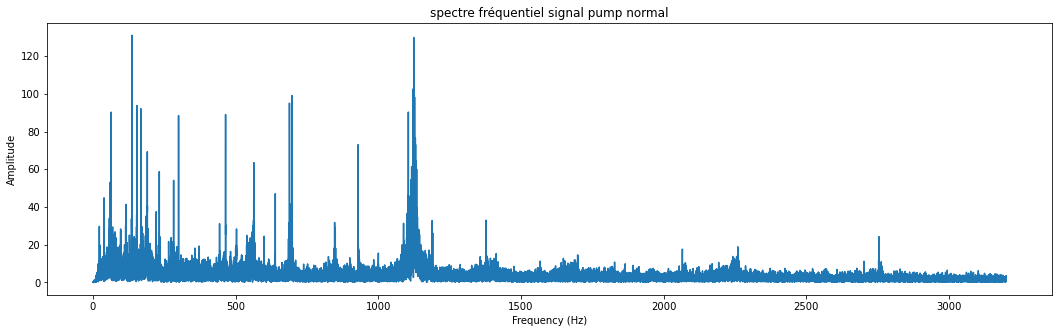

In [18]:
plot_magnitude_spectrum(pump_train_fft[51], "spectre fréquentiel signal pump normal", fe, 0.2)

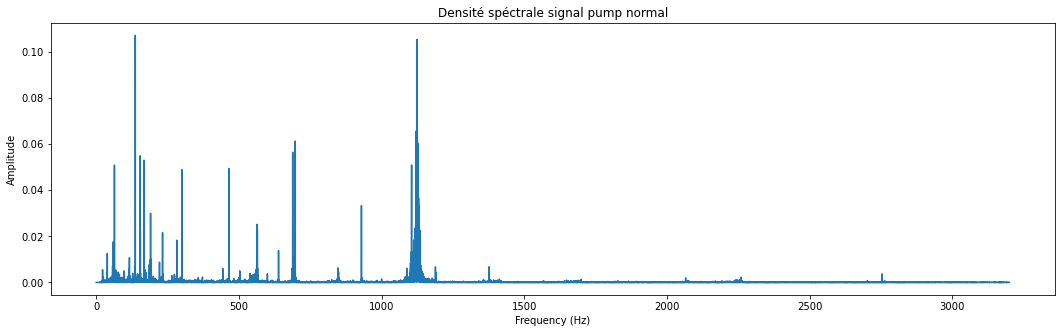

In [19]:
power_spectrum(pump_train_fft[51], fe, "Densité spéctrale signal pump normal", 0.2)

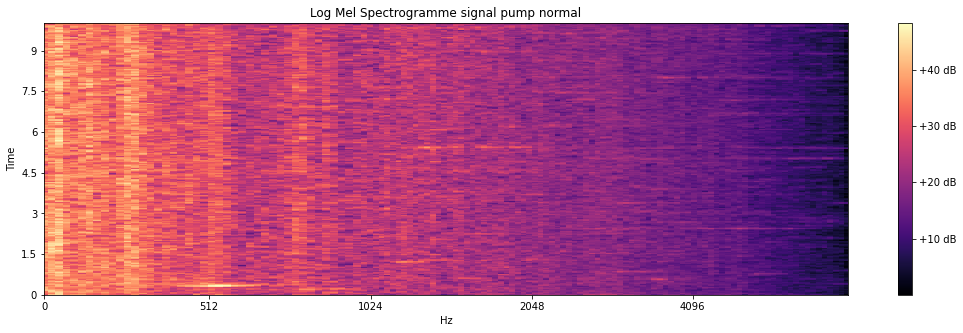

In [20]:
plot_logMelspectrogram(list_pump_train[10], "Log Mel Spectrogramme signal pump normal", fe)

In [21]:
Audio(list_pump_train[10], rate=16000)

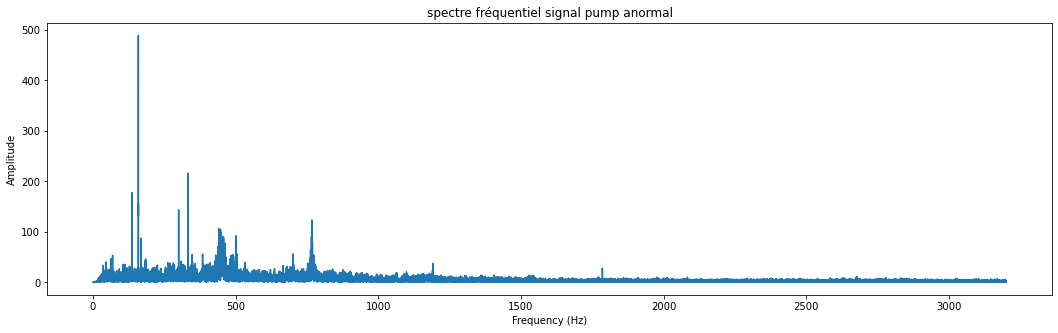

In [22]:
plot_magnitude_spectrum(pump_ano_fft[10], "spectre fréquentiel signal pump anormal", fe, 0.2)

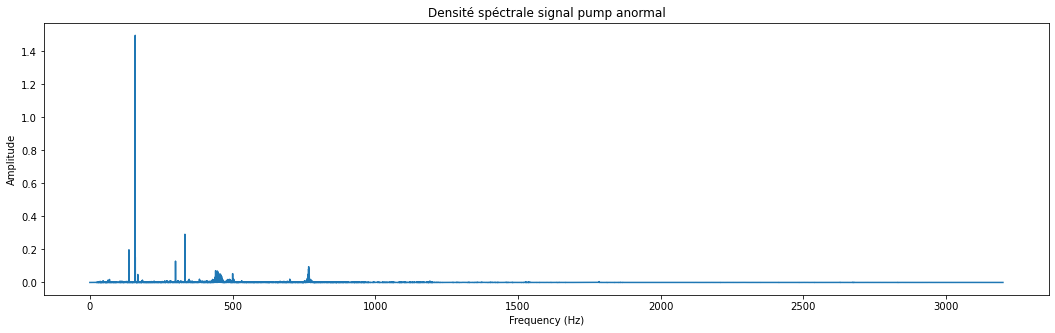

In [23]:
power_spectrum(pump_ano_fft[10], fe, "Densité spéctrale signal pump anormal", 0.2)

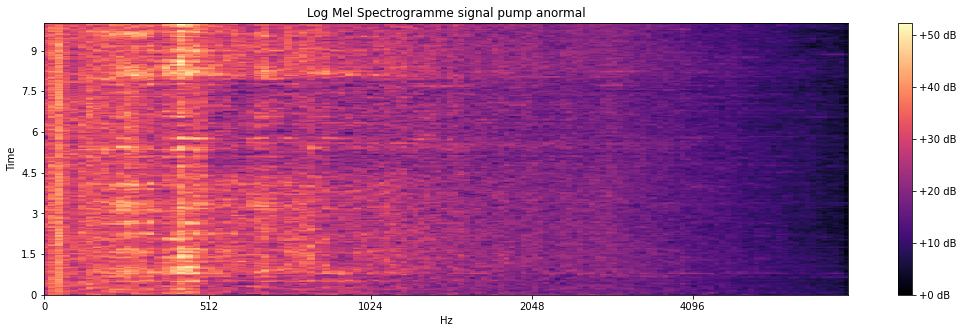

In [24]:
plot_logMelspectrogram(list_pump_ano[20], "Log Mel Spectrogramme signal pump anormal", fe)

In [25]:
Audio(list_pump_ano[20], rate=16000)

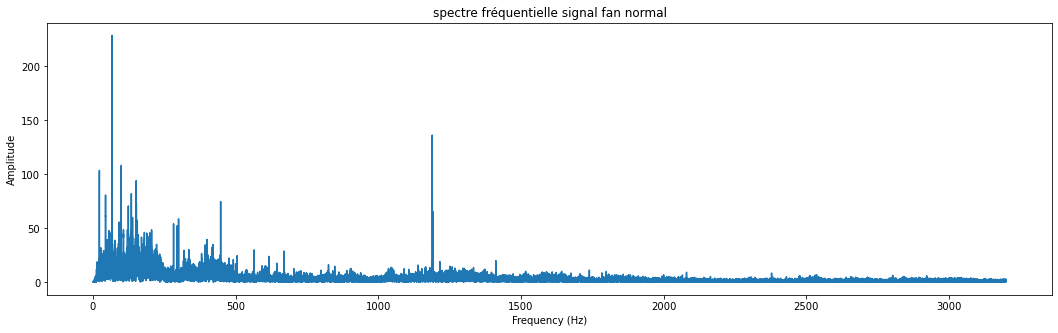

In [45]:
plot_magnitude_spectrum(fan_train_fft[20], "spectre fréquentielle signal fan normal", fe, 0.2)

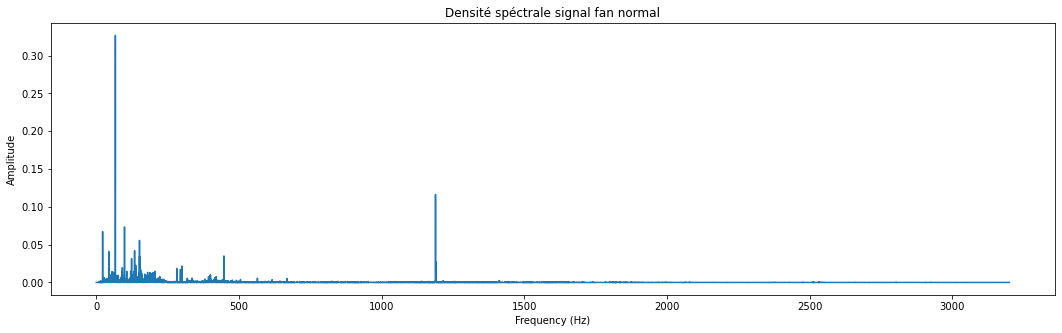

In [44]:
power_spectrum(fan_train_fft[20], fe, "Densité spéctrale signal fan normal", 0.2)

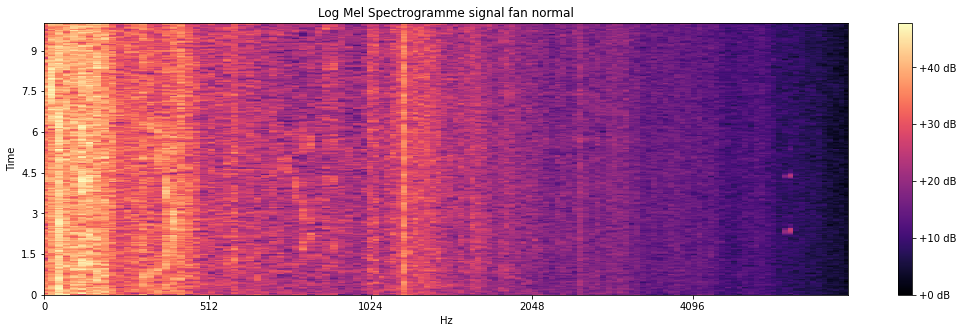

In [42]:
plot_logMelspectrogram(list_fan_train[20], "Log Mel Spectrogramme signal fan normal", fe)

In [43]:
Audio(list_fan_train[20], rate=16000)

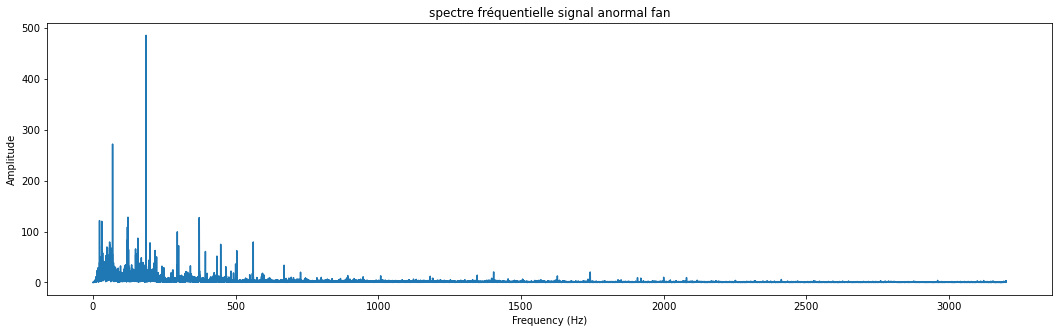

In [56]:
plot_magnitude_spectrum(fan_ano_fft[10], "spectre fréquentielle signal anormal fan", fe, 0.2)

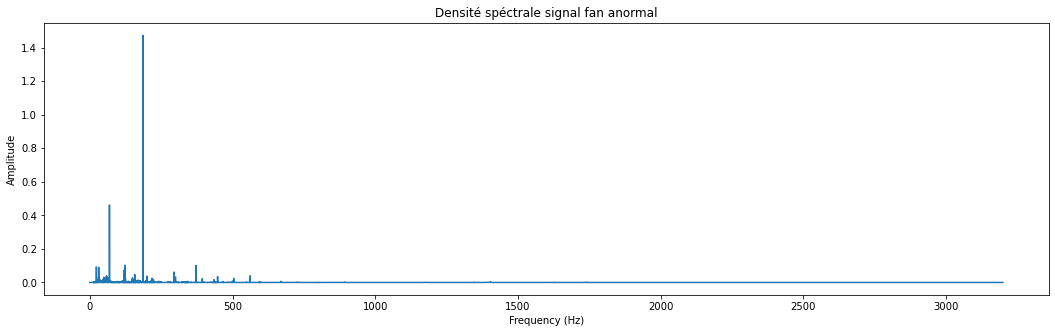

In [55]:
power_spectrum(fan_ano_fft[10], fe, "Densité spéctrale signal fan anormal", 0.2)

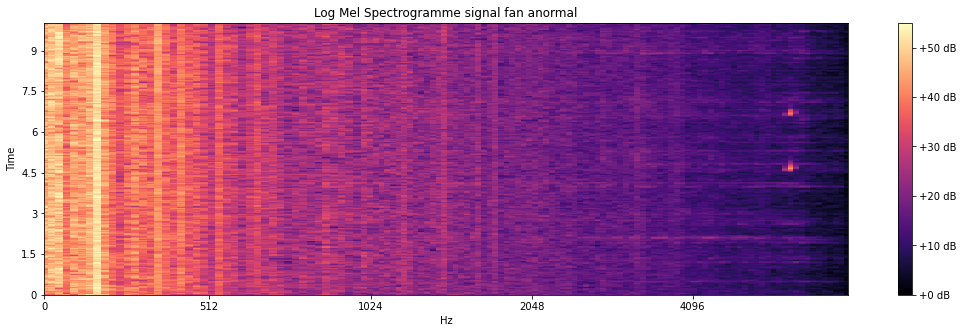

In [54]:
plot_logMelspectrogram(list_fan_ano[10], "Log Mel Spectrogramme signal fan anormal", fe)

In [53]:
Audio(list_fan_ano[10], rate=16000)

In [34]:
# plot logMelSpectogram    
def plot_logMelspectrogram(sample, title, fe):
    sgram = librosa.stft(sample)
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=fe)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    plt.figure(figsize=(18,5))
    librosa.display.specshow(np.transpose(mel_sgram), sr=fe, x_axis='mel', y_axis='time')
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.show()

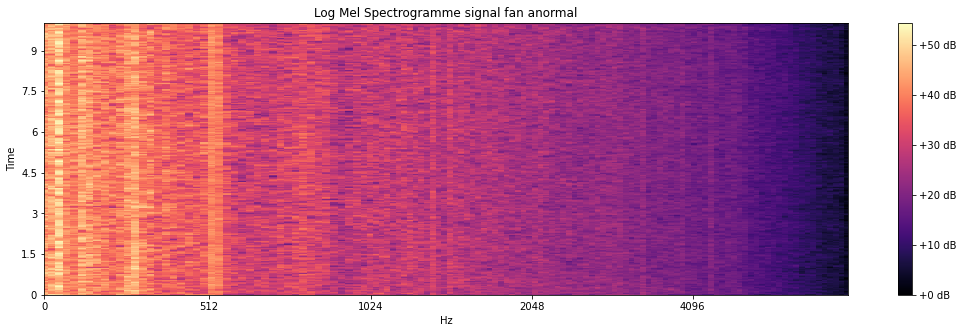

In [39]:
plot_logMelspectrogram(list_fan_ano[20], "Log Mel Spectrogramme signal fan anormal", fe)